In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
data = pd.read_csv("D:\Data\CSV\car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


###  Looking for basic information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


### Plotting Correlation matrix

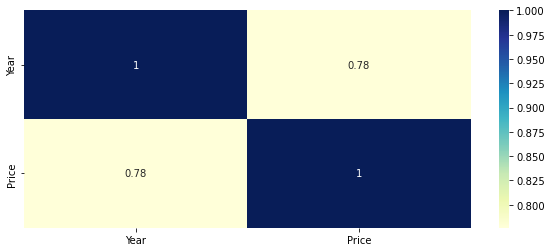

In [6]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, annot=True, cmap='YlGnBu');

### Checking for missing values

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
data.columns

Index(['Year', 'Price'], dtype='object')

### To find outliers in case

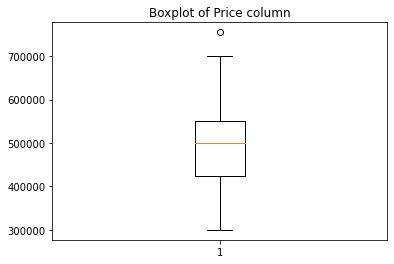

In [9]:
plt.boxplot(data['Price'])
plt.title('Boxplot of Price column')
plt.show()

In [10]:
# there are some outliers above 700000

In [11]:
# find the outliers
data[data['Price']>700000]

,Year,Price
1,2019,755000


In [12]:
data[data['Price']>=700000]

,Year,Price
1,2019,755000
2,2019,700000
98,2020,700000


In [13]:
sort = data.sort_values('Year')
sort

,Year,Price
53,2013,345000
52,2013,345000
50,2013,325000
73,2013,320000
81,2014,390000
...,...,...
10,2019,500000
99,2020,600000
98,2020,700000
39,2020,545000


In [14]:
# this shows that the car price tend to increase as year passes by
# so no need to drop the outliers - maybe useful data

### Best linear relationship  between year and price

In [15]:
# best linear relationship means best fit line between year and price
# y=mx+c is the eqn of straight line.  it shows the best linear relationship

In [16]:
# Preparing X and y from the given data
x = data['Year']
y = data['Price']

## Calculating parameters (Usually, intercept-theta1 and slope-theta0)
# (Here, intercept - y and slope - m)
## of the line using the numpy.polyfit() function
# theta = np.polyfit(X, y, 1)     ----- here we can use m and y

m, b = np.polyfit(x, y, 1)
print('Slope :',m)
print('Intercept :',b)

Slope : 43453.37988792696
Intercept : -87147246.05487856


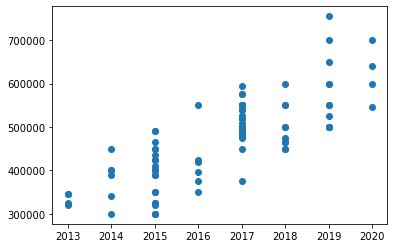

In [17]:
plt.plot(x, y,'o');

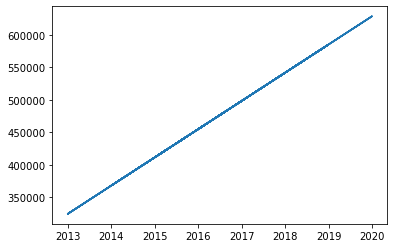

In [18]:
plt.plot(x, m*x + b);

''

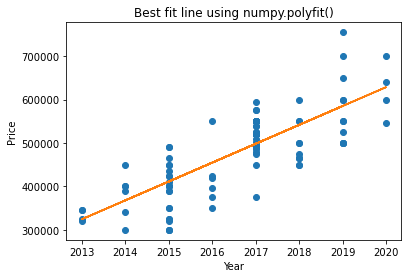

In [19]:
# create a scatter plot
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.title('Best fit line using numpy.polyfit()')
plt.xlabel('Year')
plt.ylabel('Price')
;

The parameters of the line: [ 4.34533799e+04 -8.71472461e+07]


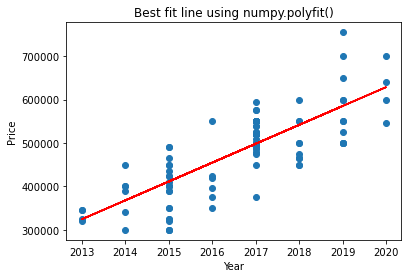

In [20]:
# Another method

# Calculating parameters (Here, intercept-theta1 and slope-theta0)
# of the line using the numpy.polyfit() function
theta = np.polyfit(x, y, 1)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0, theta1 and theta2
y_line = theta[1] + theta[0] * x

# Plotting the data points and the best fit line
plt.scatter(x, y)
plt.plot(x, y_line, 'r')
plt.title('Best fit line using numpy.polyfit()')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [21]:
# m - slope
# b - intercept
# x - year
# y - price

# we know 'm' and 'b' are always constant for a straight line
# so if we know 'm' and 'b' and we have the year whose price is to be predicted we can cubstitute in the equation

In [22]:
# take x = 2022
y = m*2022 + b
y

715488.078509748

In [23]:
# Therefore the above is the predicted price of second-hand grand i10 from best fit line 

### Linear Regression

In [24]:
X = data.drop(['Price'], axis=1)
y = data['Price']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [26]:
X_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [27]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [28]:
y_train

66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64

In [29]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [30]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error is :', mean_squared_error(y_test, predictions))
print('R Squared Value is :', r2_score(y_test, predictions))

Mean Squared Error is : 4326906256.829671
R Squared Value is : 0.36759313425902185


In [32]:
# To predict the possible price of second-hand i10 grand in the year of 2022 using Linear Regression

In [33]:
# list the year you want to predict
year = [2022]

# 1D array is not expected to do prediction, so change into dataframe, create an instance
year = pd.DataFrame(year, columns=['Year'])

# make a prediction
prediction_2022 = model.predict(year)
prediction_2022

array([743601.61594504])

In [34]:
model.predict([[2022]])

C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

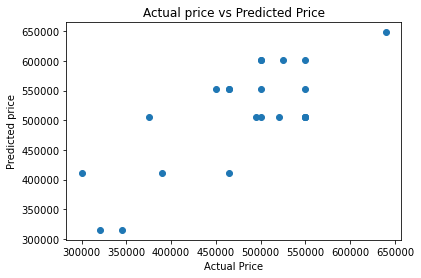

In [35]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

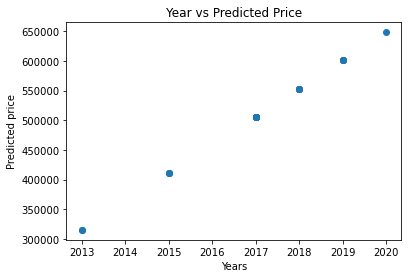

In [36]:
plt.scatter(X_test,predictions)
plt.xlabel("Years")
plt.ylabel("Predicted price")
plt.title("Year vs Predicted Price")
plt.show()

### Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

In [38]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [39]:
predictions2 = lasso.predict(X_test)

In [40]:
predictions2

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [41]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((predictions2 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 4326859771.015669
  Columns  Coefficient Estimate
0    Year            47608.1556


In [42]:
print('R Squared Value is :', r2_score(y_test, predictions2))

R Squared Value is : 0.3675999284778446


In [43]:
# To predict the possible price of second-hand i10 grand in the year of 2022 using Lasso Regression

In [44]:
year = [2022]
year = pd.DataFrame(year, columns=['Year'])
predictions_2022 = lasso.predict(year)
predictions_2022

array([743599.37427144])

In [45]:
# another way to write
lasso.predict([[2022]])

C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])

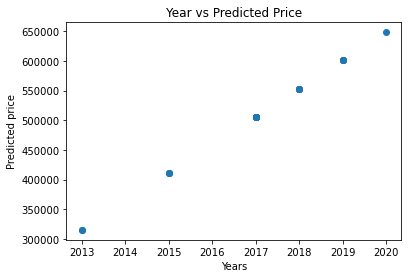

In [46]:
# visualization
plt.scatter(X_test,predictions2)
plt.xlabel("Years")
plt.ylabel("Predicted price")
plt.title("Year vs Predicted Price")
plt.show()

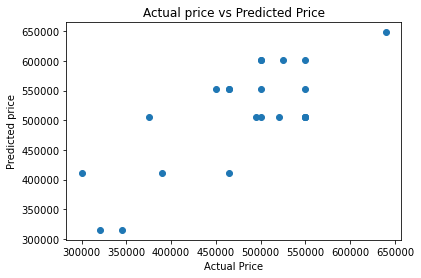

In [47]:
plt.scatter(y_test,predictions2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted Price")
plt.show()

## Conclusion

### Price predicted of a 2022 model second-hand grand i10 from 
    (a) Best Fit Line       -  715488.078509748
    (b) Linear Regression   -  743601.61594504
    (c) Lasso Regression    -  743599.37427144

### Mean Squared Error of
    (a)  Linear Regression   -   4326906256.829671
    (b)  Lasso Regression    -   4326859771.015669

### R Squared Value of
    (a)  linear Regression   -   0.36759313425902185
    (b)  Lasso Regression    -   0.3675999284778446

####  MSE should be as low as possible for a good ML model.   Here Lasso Regression Model has lower value

#### R 2 Score should be nearer to 1, and here Lasso has R 2 Score nearer to 1

###  Hence Lasso Regression Model is better than Linear Regression Model